In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-02 08:58:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.007s  

2024-10-02 08:58:20 (38.0 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [3]:
df=pd.read_csv('laptops.csv')

print(df.head())

                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        Model            CPU  RAM  Storage Storage type       GPU  Screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  Touch  Final Price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

In [4]:
# Normalize the names of columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.head())

                                              laptop status   brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        model            cpu  ram  storage storage_type       gpu  screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  touch  final_price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

In [5]:
# Select ram, storage, screen and final_price
df= df[['ram', 'storage','screen','final_price']]

<Axes: xlabel='final_price', ylabel='Count'>

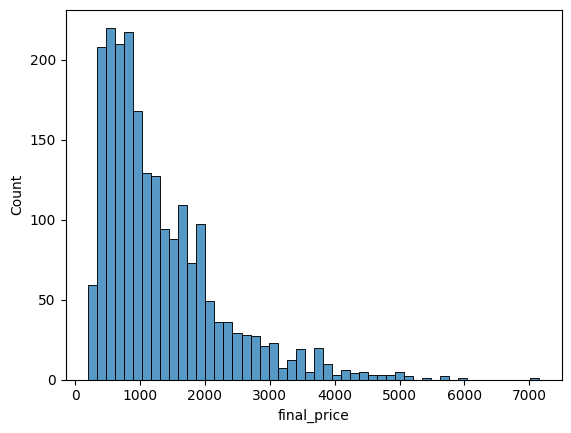

In [6]:
#Does final_price have a long tail?
import matplotlib.pyplot as plt
import seaborn as sns

 # this linke makes sure we can view the plots in a notebook
%matplotlib inline

sns.histplot(df.final_price, bins = 50)

<Axes: xlabel='final_price', ylabel='Count'>

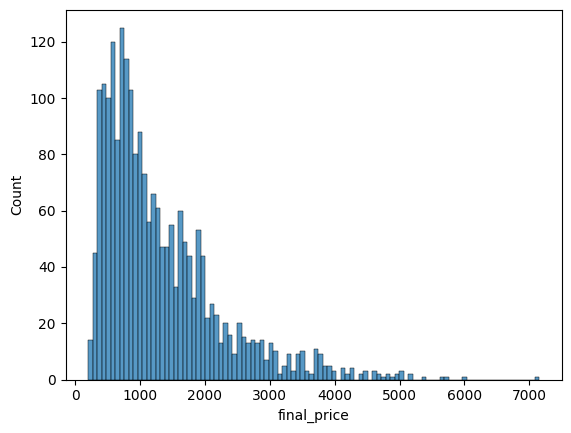

In [17]:
sns.histplot(df.final_price, bins = 100)

In [7]:
#Question 1 - There's one feature with missing values. What is it?
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


In [8]:
#Q2 What's the median (50% percentail) for the variable ram?
median_ram = df['ram'].median()
print(median_ram)

16.0


In [68]:
#Shuffle the index - set a random seed = 42 s
np.random.seed(42)

n= len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

#Create the dataframes from the shuffled index
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_val+n_train:]]

In [69]:
#Take the final_price out and use log
y_train_orig =df_train.final_price.values
y_val_orig =df_val.final_price.values
y_test_orig =df_test.final_price.values

y_train =df_train.final_price.values
y_val =df_val.final_price.values
y_test =df_test.final_price.values

In [70]:
# Removes the final_price from our dataframe because we don't want to use it in our model
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [71]:
# Prepare Data - Replace empty values with 0
def prepare_X(df):
  df = df.copy()

  df['screen'] = df['screen'].fillna(0)
  X = df.values
  return X

In [72]:
# Linear Regression Model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [73]:
def rmse  (y, y_pred):
  error = y_pred - y
  mse = (error ** 2).mean()
  return np.sqrt(mse)

In [74]:
# Prepare the data and train the model on the new train data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [75]:
# Our predictions
y_pred = w0 + X_train.dot(w)

In [76]:
rmse(y_train, y_pred)

613.1358001105385

In [77]:
# Prepare the data and train the model on train data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Prepare the val dataset and apply the model
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Accuracy of model on validation dataset
with_0 = rmse(y_val, y_pred)
round(with_0,2)

564.14

In [78]:
# Prepare Data - Replace empty values with mean
def prepare_X(df):
  df = df.copy()

  df['screen'] = df['screen'].fillna(df['screen'].mean())
  X = df
  return X

In [79]:
# Prepare the data and train the model on train data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Prepare the val dataset and apply the model
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# # Accuracy of model on validation dataset
with_0 = rmse(y_val, y_pred)
round(with_0,2)

566.21

In [80]:
# Prepare Data - Replace empty values with 0
def prepare_X(df):
  df = df.copy()

  df['screen'] = df['screen'].fillna(0)
  X = df
  return X

In [81]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [82]:
X_train = prepare_X(df_train)

In [83]:
# Test different r values, using the
for r in [0.0,0.01,0.1,1,5,10,100]:
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  rounded_score = round(score,2)

  print(r, rounded_score)



0.0 564.14
0.01 564.15
0.1 564.18
1 564.49
5 565.63
10 566.56
100 569.2


In [84]:
#Shuffle the index - set a random seed = 42 s
np.random.seed(42)

n= len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

#Create the dataframes from the shuffled index
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_val+n_train:]]

In [85]:
results = []

# Test different seed values, using the
for s in [0,1,2,3,4,5,6,7,8,9]:
  np.random.seed(s)

  n= len(df)
  n_val = int(n * 0.2)
  n_test = int(n * 0.2)
  n_train = n - n_val - n_test

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  #Create the dataframes from the shuffled index
  df_train = df_shuffled.iloc[idx[:n_train]]
  df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
  df_test = df_shuffled.iloc[idx[n_val+n_train:]]

  #Take the final_price out and use log
  y_train_orig =df_train.final_price.values
  y_val_orig =df_val.final_price.values
  y_test_orig =df_test.final_price.values

  y_train =df_train.final_price.values
  y_val =df_val.final_price.values
  y_test =df_test.final_price.values

  # Removes the median_house_value from our dataframe because we don't want to use it in our model
  del df_train['final_price']
  del df_val['final_price']
  del df_test['final_price']

  X_train = prepare_X(df_train)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  print(s, score)

  results.append((s,score))

# Convert the list of tuples into a Pandas DataFrame
rsme_scores = pd.DataFrame(results, columns=['s','score'])
rsme_scores

0 583.5744443737307
1 575.1087779630693
2 606.2078162219988
3 575.6303517699316
4 579.0086402614394
5 634.6813651692875
6 590.790197341977
7 707.4674533840671
8 579.5882399136723
9 576.1774218564965


,s,score
0,0,583.574444
1,1,575.108778
2,2,606.207816
3,3,575.630352
4,4,579.008640
5,5,634.681365
6,6,590.790197
7,7,707.467453
8,8,579.588240
9,9,576.177422


In [99]:
round(np.std(rsme_scores.score),3)

39.72

In [87]:
#Shuffle the index - set a random seed = 42 s
np.random.seed(9)

n= len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

#Create the dataframes from the shuffled index
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_val+n_train:]]

In [88]:
#Take the final_price out and use log
y_train_orig =df_train.final_price.values
y_val_orig =df_val.final_price.values
y_test_orig =df_test.final_price.values

y_train =df_train.final_price.values
y_val =df_val.final_price.values
y_test =df_test.final_price.values

In [89]:
# Removes the final_price from our dataframe because we don't want to use it in our model
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [90]:
# Prepare Data - Replace empty values with 0
def prepare_X(df):
  df = df.copy()

  df['screen'] = df['screen'].fillna(0)
  X = df.values
  return X

In [91]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [92]:
# combine train and val data
df_full_train = pd.concat([df_train, df_val])

In [93]:
df_full_train=df_full_train.reset_index(drop=True)
df_full_train

,ram,storage,screen
0,8,256,15.6
1,8,256,15.6
2,16,500,15.6
3,16,512,15.6
4,32,1000,17.3
...,...,...,...
1723,16,512,14.0
1724,32,1000,16.2
1725,8,256,15.6
1726,8,512,15.6


In [94]:
# Get the full train matrix
X_full_train = prepare_X(df_full_train)

In [95]:
# Also need a full train for y - the result variable
y_full_train = np.concatenate([y_train, y_val])

In [96]:
# Train the model using full train
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [97]:
# Prepare testing dataset and apply model
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

599.6132081978533